# Introduction

In [326]:
import pandas as pd
import seaborn as sns
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import folium
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)

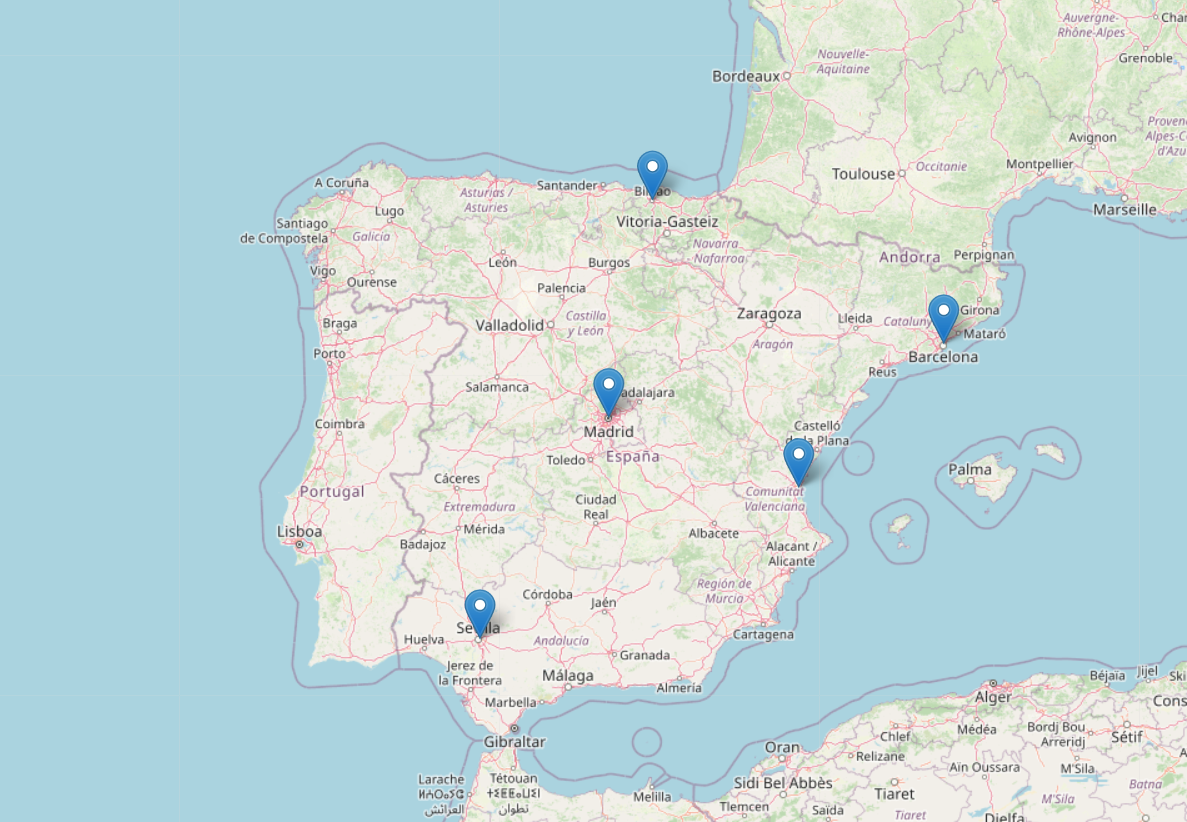

In [327]:
from IPython.display import Image
Image(filename='spain-map.png')

# Data Importing and Cleaning

## Energy Dataset

In [328]:
# Reading data
energy_df = pd.read_csv('data/energy_dataset.csv', index_col='time')

# Converting index to datetime format
energy_df.index = pd.to_datetime(energy_df.index, utc=True, infer_datetime_format=True)

In [329]:
energy_df.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
2015-01-01 00:00:00+00:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,920.0,1009.0,1658.0,0.0,7096.0,43.0,71.0,50.0,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2015-01-01 01:00:00+00:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,1164.0,973.0,1371.0,0.0,7099.0,43.0,73.0,50.0,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
2015-01-01 02:00:00+00:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,1503.0,949.0,779.0,0.0,7098.0,43.0,75.0,50.0,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
2015-01-01 03:00:00+00:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,1826.0,953.0,720.0,0.0,7097.0,43.0,74.0,42.0,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [330]:
energy_df.describe().round(2)

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35045.00,35046.00,35046.0,35046.00,35046.00,35045.00,35046.0,35046.0,35046.0,0.0,35045.00,35045.00,35046.00,35045.0,35047.00,35046.00,35046.00,35046.00,35045.00,35046.0,35046.00,35064.00,0.0,35064.00,35064.00,35028.00,35064.00,35064.00
mean,383.51,448.06,0.0,5622.74,4256.07,298.32,0.0,0.0,0.0,NaN,475.58,972.12,2605.11,0.0,6263.91,60.23,85.64,1432.67,269.45,0.0,5464.48,1439.07,NaN,5471.22,28712.13,28696.94,49.87,57.88
std,85.35,354.57,0.0,2201.83,1961.60,52.52,0.0,0.0,0.0,NaN,792.41,400.78,1835.20,0.0,839.67,20.24,14.08,1680.12,50.20,0.0,3213.69,1677.70,NaN,3176.31,4594.10,4574.99,14.62,14.20
min,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,NaN,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,NaN,237.00,18105.00,18041.00,2.06,9.33
25%,333.00,0.00,0.0,4126.00,2527.00,263.00,0.0,0.0,0.0,NaN,0.00,637.00,1077.25,0.0,5760.00,53.00,73.00,71.00,240.00,0.0,2933.00,69.00,NaN,2979.00,24793.75,24807.75,41.49,49.35
50%,367.00,509.00,0.0,4969.00,4474.00,300.00,0.0,0.0,0.0,NaN,68.00,906.00,2164.00,0.0,6566.00,57.00,88.00,616.00,279.00,0.0,4849.00,576.00,NaN,4855.00,28906.00,28901.00,50.52,58.02
75%,433.00,757.00,0.0,6429.00,5838.75,330.00,0.0,0.0,0.0,NaN,616.00,1250.00,3757.00,0.0,7025.00,80.00,97.00,2578.00,310.00,0.0,7398.00,2636.00,NaN,7353.00,32263.25,32192.00,60.53,68.01
max,592.00,999.00,0.0,20034.00,8359.00,449.00,0.0,0.0,0.0,NaN,4523.00,2000.00,9728.00,0.0,7117.00,106.00,119.00,5792.00,357.00,0.0,17436.00,5836.00,NaN,17430.00,41390.00,41015.00,101.99,116.80


From the description of the dataframe, we find that a number of columns have mean and maximum values of 0 This is likely indicative that all row values of these columns are 0. To remove these extraneous columns we will drop any columns with all zero/NaN values. In addition, we will remove columns which include forecasting data, as we would like to make our own forecasts. This returns a dataset with only relevant columns.

In [331]:
# Select columns where the max is not equal to 0 or NaN
column_max = energy_df.max()
columns_to_keep = column_max[(column_max != 0) & (~column_max.isna())].index
energy_df = energy_df[columns_to_keep]

# dropping forecast columns
forecast_cols = [col for col in energy_df.columns if 'forecast' in col]
energy_df = energy_df.drop(columns=forecast_cols)

We now check for null and duplicate values in the remaining columns. Upon finding the null values, we will interpolate them to obtain a dataset entirely populated by numeric data.

In [332]:
# Checking null values
energy_df.isnull().sum()

generation biomass                             19
generation fossil brown coal/lignite           18
generation fossil gas                          18
generation fossil hard coal                    18
generation fossil oil                          19
generation hydro pumped storage consumption    19
generation hydro run-of-river and poundage     19
generation hydro water reservoir               18
generation nuclear                             17
generation other                               18
generation other renewable                     18
generation solar                               18
generation waste                               19
generation wind onshore                        18
total load actual                              36
price day ahead                                 0
price actual                                    0
dtype: int64

In [333]:
# Checking duplicates
print("Number of duplicates in energy_df:", energy_df.duplicated().sum())

Number of duplicates in energy_df: 0


In [334]:
# Interpolating null values
energy_df.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)

# Verifying that null values are no longer present
energy_df.isnull().sum(axis=0).sum() == 0

True

We next define a time series plotting function for our dataframe. This will be used to visualize how the data evolves over time. Upon the defininition of this function, we plot a number of important variables over the first 4 weeks of operation. These variables are power generated by source, total load, and power prices.

In [335]:
def plot_time_series(df, cols=None, title="Time Series", ylabel="Values", 
                     subplots=False, start=0, end=None, legend=True):
    """
    Plots a time series using pandas DataFrame's plot method with seaborn styles.

    Parameters:
    - df (pandas.DataFrame): DataFrame containing the time series data.
    - cols (list): List of columns from df to plot. If None, all columns are plotted.
    - title (str): Title for the plot.
    - ylabel (str): Y-axis label.
    - subplots (bool): If True, plots each column in a separate subplot. Otherwise, plots them on the same axes.
    - start (int): Starting index for slicing the df. Useful for zooming in on a part of the time series.
    - end (int): Ending index for slicing the df. Useful for zooming in on a part of the time series.
    - legend (bool): If True, displays the legend.

    Returns:
    None. Displays the plot.
    """

    # Set seaborn styling for the plot
    sns.set()

    # Plot the specified columns of the DataFrame from start to end index.
    df[cols][start:end].plot(
        subplots=subplots, 
        figsize=(15,5)
    )

    # Set title and axis labels for the plot
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel(ylabel)

    # Display the legend if legend=True
    if legend:
        plt.legend()

    # Display the plot
    plt.show()

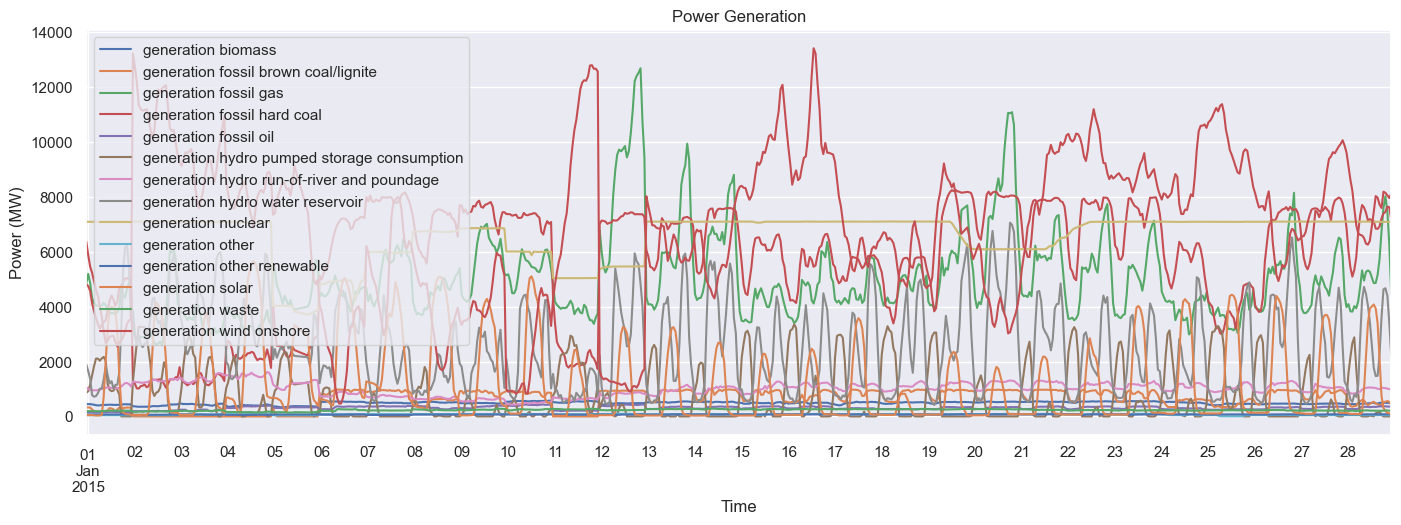

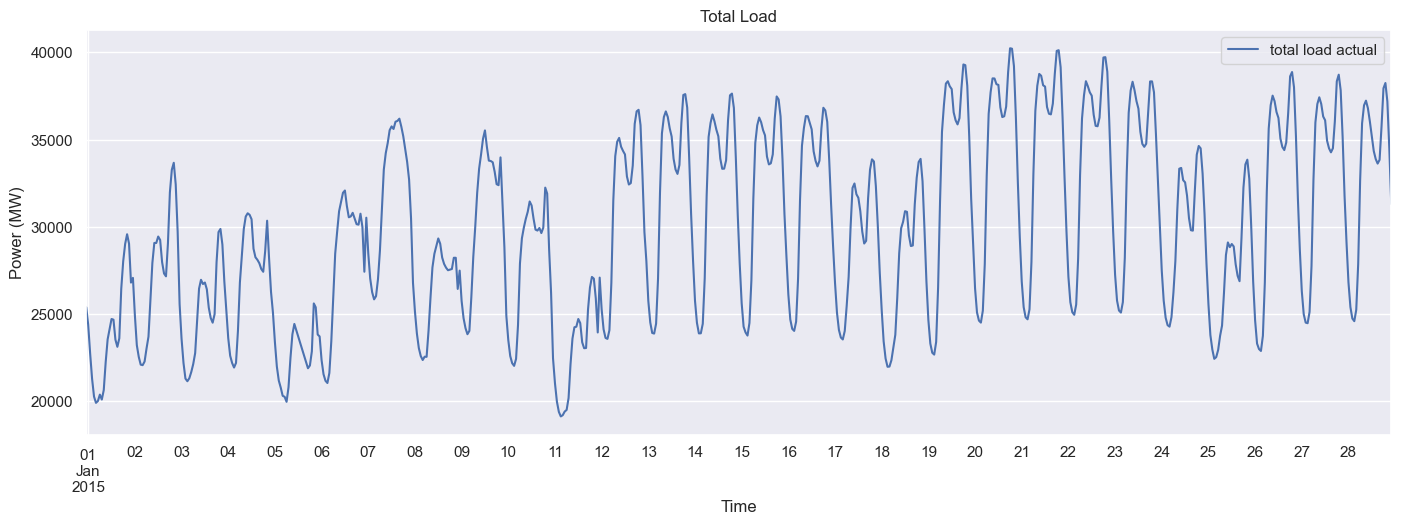

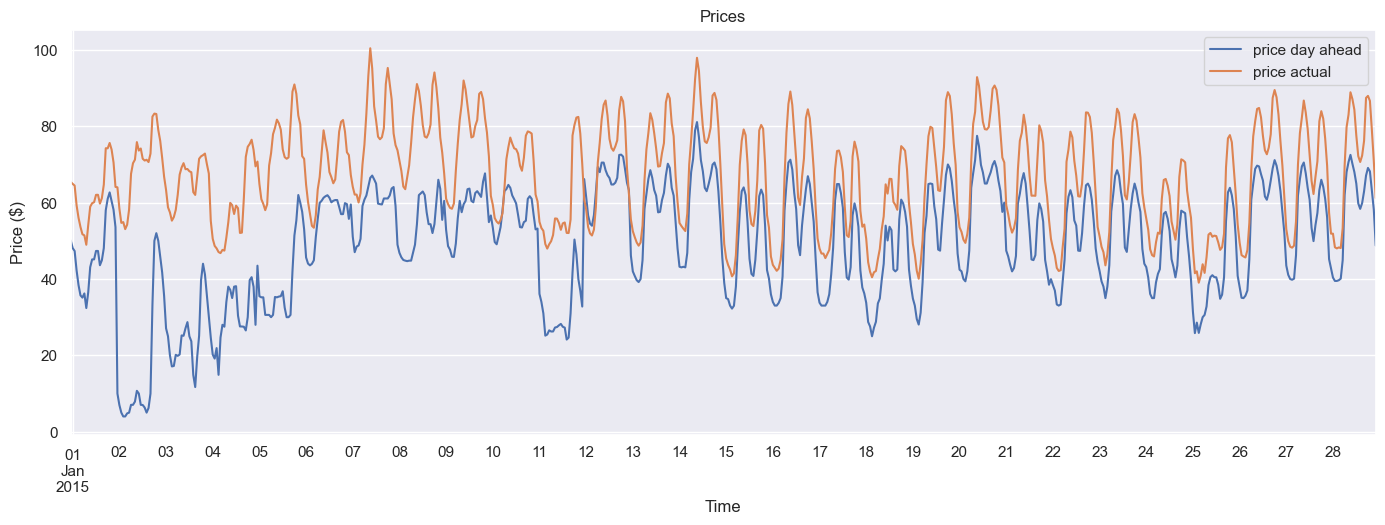

In [336]:
# Defining end date for first 4 weeks
end = 4*7*24

# Plotting relevant characteristics
plot_time_series(energy_df, cols = energy_df.columns[0:14], title='Power Generation', ylabel="Power (MW)", end=end)
plot_time_series(energy_df, cols = energy_df.columns[14], title='Total Load', ylabel="Power (MW)", end=end)
plot_time_series(energy_df, cols = energy_df.columns[15:17], title='Prices', ylabel="Price ($)", end=end)

## Weather Dataset

In [337]:
# Uploading weather dataset
weather_df = pd.read_csv('data/weather_features.csv', index_col= 'dt_iso')

# Correctly formatting the index column
weather_df.index = pd.to_datetime(weather_df.index, utc=True, infer_datetime_format=True)

# Renaming index for simplicity
weather_df.index.name = 'time'

In [338]:
weather_df.head()

,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
time,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2015-01-01 00:00:00+00:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2015-01-01 01:00:00+00:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2015-01-01 02:00:00+00:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2015-01-01 03:00:00+00:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [339]:
weather_df.describe().round(2)

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
count,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00
mean,289.62,288.33,291.09,1069.26,68.42,2.47,166.59,0.08,0.00,0.00,25.07,759.83
std,8.03,7.96,8.61,5969.63,21.90,2.10,116.61,0.40,0.01,0.22,30.77,108.73
min,262.24,262.24,262.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,200.00
25%,283.67,282.48,284.65,1013.00,53.00,1.00,55.00,0.00,0.00,0.00,0.00,800.00
50%,289.15,288.15,290.15,1018.00,72.00,2.00,177.00,0.00,0.00,0.00,20.00,800.00
75%,295.15,293.73,297.15,1022.00,87.00,4.00,270.00,0.00,0.00,0.00,40.00,801.00
max,315.60,315.15,321.15,1008371.00,100.00,133.00,360.00,12.00,2.32,21.50,100.00,804.00


From the dataframe description, a number of things stand out. These are listed below:

* The ***rain_3h*** column doesn't make sense. The rain_1h and rain_3h columns specificy the amount of rainfall which occured in the previous 1 and 3 hours, respectively. The rain_3h column is erronous because it has a lower mean value than the rain_1h column. If it were correct, it would be larger. For this reason, we will drop the column. We now check for null values in the dataset.

* Some columns have extremely high standard deviations. Examining the ***pressure*** collumn especially, we find a massive standard deviation. We should examine the outliers of all columns in more detail.

* The maximum value in the ***wind_speed*** column, we find the maximum value to be very high. Becuase wind speeds are measured in $m/s$, the maximum value of $133~m/s$ equates to about $479~km/h$. This is on par with the fastest wind speeds ever recorded on earth [1], and higher than any wind speed over recorded in Spain, thus should be further examined.

To mitigate these concerns we start by dropping the ***rain_3h*** column.

In [340]:
# Dropping rain_3h column
weather_df.drop('rain_3h', axis=1, inplace=True)

### Examining Outliers

To examine outliers, we extract numerical columns and normalize them such that they can all be inspected on a boxplot with the same axis.

In [341]:
# Defining catagorical columns
drop_cols = ['weather_id', 'weather_main', 'weather_description', 'weather_icon', 'city_name']

# Creating new dataframe with all numerical columns
weather_df_nums = weather_df.drop(drop_cols, axis = 1)

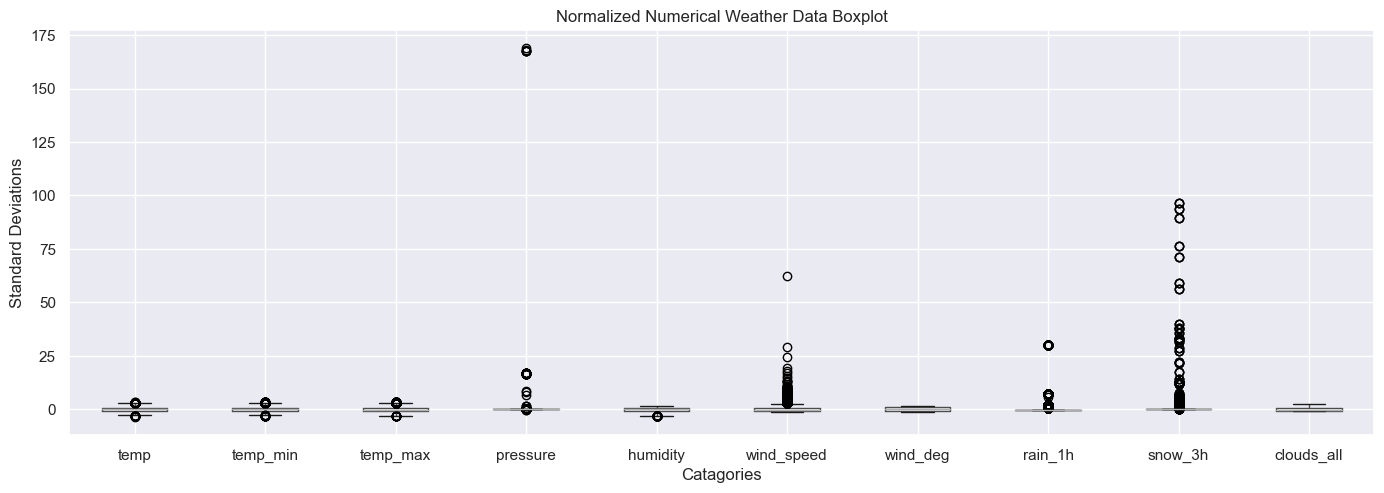

In [342]:
# Normalizing columns
normalized_df = (weather_df_nums - weather_df_nums.mean()) / weather_df_nums.std()

# Creating and labelling boxplot
normalized_df.boxplot(figsize = (15,5))
plt.title('Normalized Numerical Weather Data Boxplot')
plt.ylabel('Standard Deviations')
plt.xlabel('Catagories')
plt.show()

From the boxplot, we see that ***pressure, wind_speed, rain_1h, and snow_3h*** columns have extreme outliers. We will examine each of these individually, starting with ***pressure***.

In [343]:
def box_plotter(df, column, title="Data", xlabel=None, figsize=(15,3)):
    """
    Plots a box plot for a specified column of a dataframe.
    
    Parameters:
    - df (DataFrame): The dataframe containing the data.
    - column (str): The column name in the dataframe for which the box plot is to be generated.
    - title (str, optional): The title for the plot. Defaults to "Data".
    - xlabel (str, optional): The x-axis label. If not provided, the x-axis will have no specific label.
    - figsize (tuple, optional): Tuple indicating the width and height of the figure. Defaults to (15,3).
    
    Returns:
    - None: Displays the box plot.
    """
    
    plt.figure(figsize=figsize)
    sns.boxplot(x=df[column])
    plt.title(title)
    if xlabel is not None:
        plt.xlabel(xlabel)
    plt.show()


#### Pressure Data

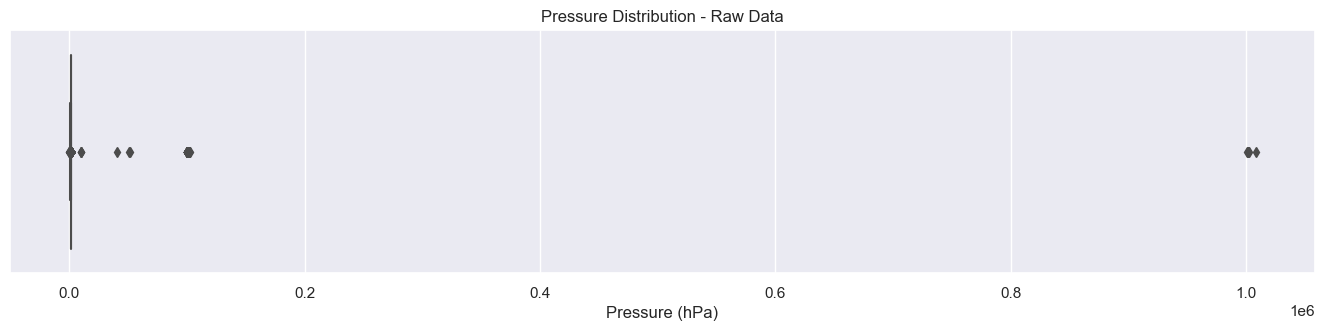

In [344]:
# Raw pressure data boxplot
box_plotter(weather_df, 'pressure', title='Pressure Distribution - Raw Data', xlabel='Pressure (hPa)')

From the pressure data, we see that there are some pretty extreme outliers. The highest recorded pressure is approximately $ 10^6~hPa$, which is a pressure similar to that at the bottom of the Mariana Trench [2]. This is obviously not a correct measurement.

Furthermore, the highest and lowest pressures ever recorded in Spain were $1051~hPa$  and $950~hPa$ respectively [3]. Beucause of this, we will ignore all data with pressure readings outside of this range.

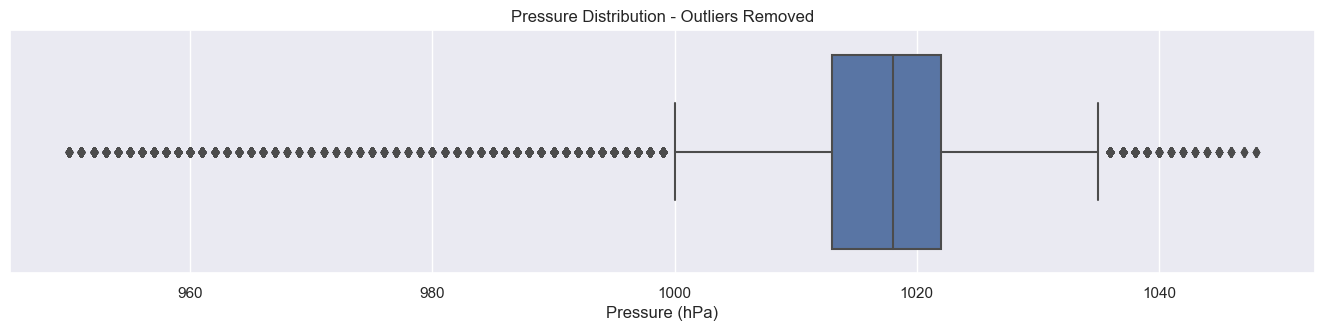

In [345]:
# Removing outliers
weather_df.loc[(weather_df['pressure'] > 1051) | (weather_df['pressure'] < 950), 'pressure'] = np.nan

# Replotting pressure data with outliers removed
box_plotter(weather_df, 'pressure', title='Pressure Distribution - Outliers Removed', xlabel='Pressure (hPa)')

#### Wind Speed

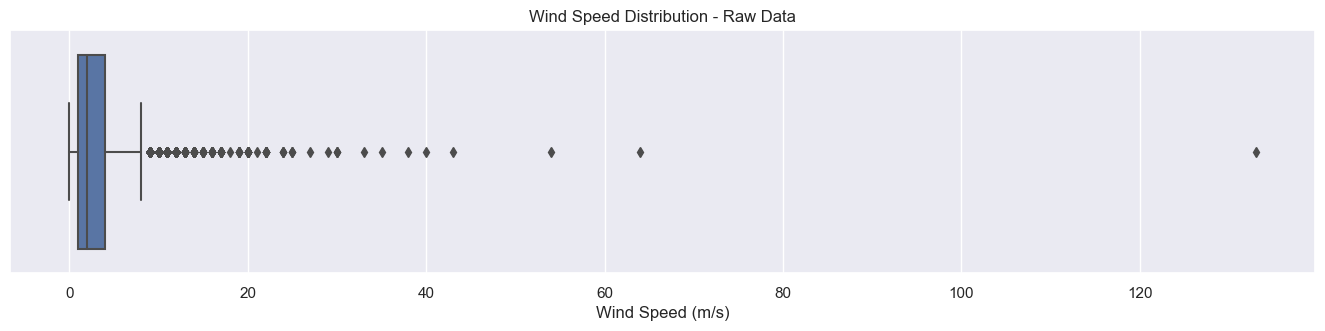

In [346]:
# Raw wind speed boxplot
box_plotter(weather_df, 'wind_speed', title='Wind Speed Distribution - Raw Data', xlabel='Wind Speed (m/s)')

We see that there is a pretty obvious outlier in this dataset. As previously mentioned, the  $133~m/s$ wind recorded would be faster than any wind speed recorded in Spain. For reference the highest wind speed ever recorded in Spain are approximately $200~km/h$ or about $56~m/s$. Because of this we will remove any data with wind speeds higher than $50~m/s$.

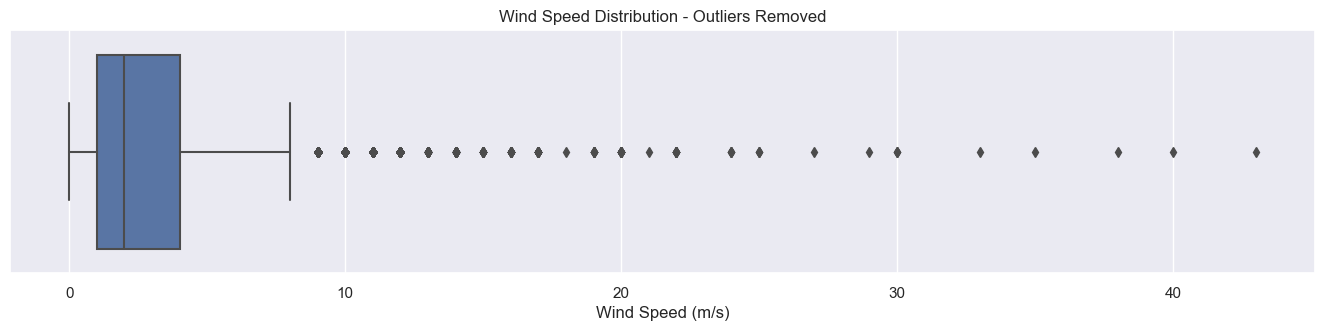

In [347]:
# Removing outliers
weather_df.loc[weather_df['wind_speed'] > 50, 'wind_speed'] = np.nan

# Replotting wind speed data with outliers removed
box_plotter(weather_df, 'wind_speed', title='Wind Speed Distribution - Outliers Removed', xlabel='Wind Speed (m/s)')


#### Rain 1h

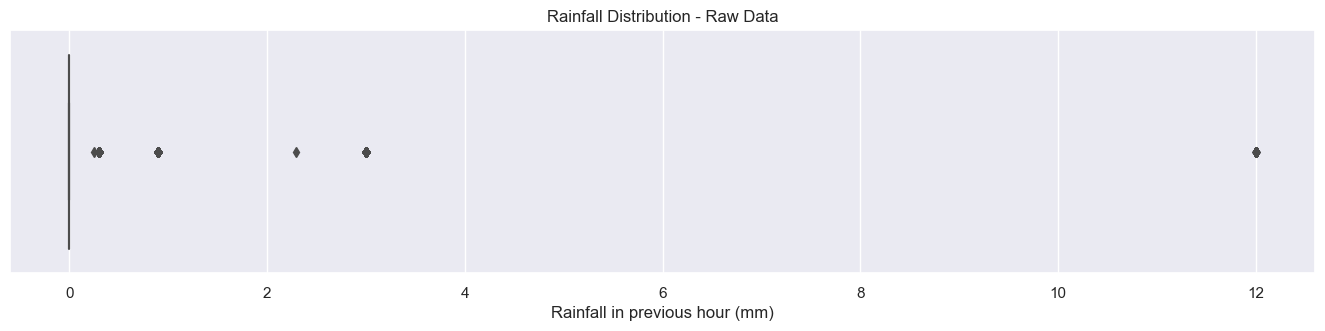

In [348]:
# Raw rainfall 1h boxplot
box_plotter(weather_df, 'rain_1h', title='Rainfall Distribution - Raw Data', xlabel='Rainfall in previous hour (mm)')

From research, it is clear that Spanish rainfalls of $100~mm/hour$ are possible [4]. Therefor, it is reasonable to assume that the $12~mm$ readings are entirely reasonable and do not need to be removed. Finally, we examing the ***snow_3h*** column.

#### Snow 3h

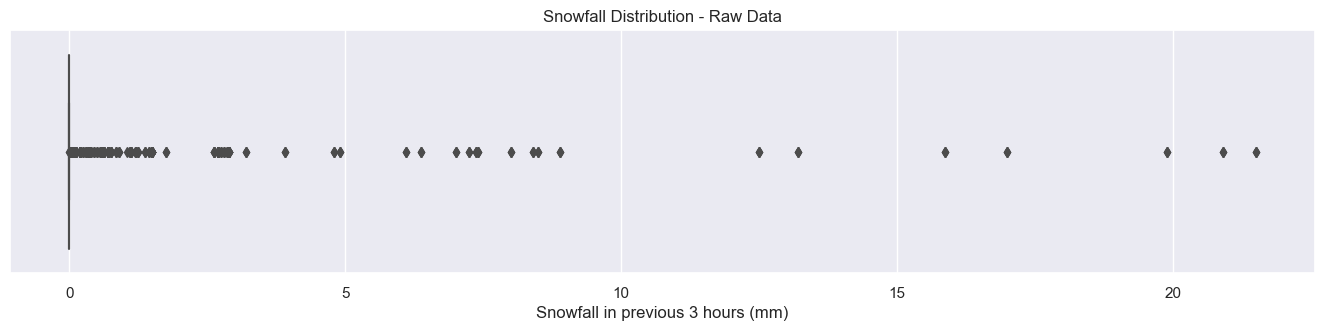

In [349]:
# Raw snowfall 3h boxplot 
box_plotter(weather_df, 'snow_3h', title='Snowfall Distribution - Raw Data', xlabel='Snowfall in previous 3 hours (mm)')

Examining the snowfall boxplot, it is reasonable to assume that $20~mm$ of snowfall in 3 hours is entirely possible. Therefor, we will not be removing any of the snowfall data.

### Formatting Weather Dataframe

Before the eventual joining of our weather and energy dataframes, we must ensure the following:

1. **The weather dataframe is formatted correctly.**  
Currently, the weather dataframe is formatted in a way which is not condusive to joining. The time series index is not continuous, and restarts its index each time there is a unique new entry in the **city_name** column. In order for a join to take place, there must be a single index time series value, with no repeat entries dependent on the city.

2. **There must be matching index values.**  
Upon correctly formatting, there must be matching index values between the weather and energy dataframes.

3. **There must be no missing or duplicated values in either dataframe.**  
We have already ensured that there are no missing values or duplicate values in the energy dataframe. We must now ensure the same for the weather dataframe.

4. **There is no redunancy within the columns.**  
Before formatting this dataframe, we should drop any redundant columns as it will be more difficult to do so upon formatting.

To begin this process, we will examine the duplicated values in the weather dataframe.

In [370]:
# Total number of duplicate values
num_duplicated = weather_df.duplicated(keep=False).sum()
print('The total number of duplicate values in weather_df is:', num_duplicated)

The total number of duplicate values in weather_df is: 14186


It appears there a high number of duplicate values within weather_df. We now examine the number entires for each city and see if this aligns with our energy_df

In [371]:
print('The length of the energy_df is:', len(energy_df))
print('\nThe lengths of data associated with each of the cities are:')

with_duplicates = weather_df['city_name'].value_counts()
print(with_duplicates)

The length of the energy_df is: 35064

The lengths of data associated with each of the cities are:
Madrid        36267
Bilbao        35951
Seville       35557
 Barcelona    35476
Valencia      35145
Name: city_name, dtype: int64


From this analysis, there appears to be many more entires for each the cities in weather_df than there are total entries in energy_df. We need to ensure that these numbers match up. The reason for this discrepancy could be due to the high number of duplicates in the weather_df. We will examine the  duplicates of the weather_df, subsetting on ***city_name*** and ***time***

In [373]:
# Creating boolean series which returns true when 'time' and 'city_name' value pairs are repeated.
duplicated_bool = weather_df.reset_index().duplicated(subset=['time', 'city_name'], keep=False)

In [375]:
# Subsetting weather dataframe based on boolean duplicate series
duplicated_data = weather_df.reset_index()[duplicated_bool].sort_values('time')

# Showing sample of duplicate values
duplicated_data.head()

,time,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
124,2015-01-06 03:00:00+00:00,Valencia,273.142,273.142,273.142,995.0,86,1.0,265,0.0,0.0,0,800,clear,sky is clear,01n
125,2015-01-06 03:00:00+00:00,Valencia,273.142,273.142,273.142,995.0,86,1.0,265,0.0,0.0,0,800,clear,sky is clear,01n
144334,2015-03-04 05:00:00+00:00,Seville,288.470,285.150,291.150,1026.0,100,1.0,62,0.0,0.0,75,741,fog,fog,50n
144333,2015-03-04 05:00:00+00:00,Seville,288.470,285.150,291.150,1026.0,100,1.0,62,0.0,0.0,75,701,mist,mist,50n
109256,2015-03-20 20:00:00+00:00,Barcelona,286.810,282.590,291.480,1013.0,76,12.0,50,0.3,0.0,40,500,rain,light rain,10n


From our sample of duplicate values above, we can see that the duplicate values are the same in many regards. However, they do appear to differ in qualitative metrics such as ***weather_id***, ***weather_main***, ***weather_description***, and ***weather_icon***. We will now examine the quantities of duplicates values, and dive deeper into their characteristics.

In [444]:
duplicate_counts = duplicated_data.groupby(['time', 'city_name']).size()

duplicate_points = duplicate_counts.unique()
print("There are datapoints with the following number of duplicates:", duplicate_points)


There are datapoints with the following number of duplicates: [2 3 4]


Now that we know the quantities of duplicate values, we will examine datapoints which each have 4 duplicates associated with them.

In [452]:
# Determining indices of data points with 4 duplicate values
indices = duplicate_counts[duplicate_counts==4].index

# Dinding data points with 4 duplicate values
data_with_four_duplicates = duplicated_data[duplicated_data.set_index(['time', 'city_name']).index.isin(indices)]

data_with_four_duplicates.head()

,time,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
51839,2016-11-20 17:00:00+00:00,Madrid,282.78,280.15,284.15,1007.0,100,1.0,280,0.9,0.0,75,701,mist,mist,50d
51838,2016-11-20 17:00:00+00:00,Madrid,282.78,280.15,284.15,1007.0,100,1.0,280,0.9,0.0,75,501,rain,moderate rain,10d
51841,2016-11-20 17:00:00+00:00,Madrid,282.78,280.15,284.15,1007.0,100,1.0,280,0.9,0.0,75,741,fog,fog,50d
51840,2016-11-20 17:00:00+00:00,Madrid,282.78,280.15,284.15,1007.0,100,1.0,280,0.9,0.0,75,301,drizzle,drizzle,09d
53617,2017-01-27 12:00:00+00:00,Madrid,277.78,276.15,279.15,1008.0,100,3.0,340,0.9,0.0,75,501,rain,moderate rain,10d


Examining the data points with 4 duplicate values, we find that much of the data remains constant between the duplicates other than the qualitative descriptions of weather. This may be due to weather conditions updating over the course of the hour, and the software which created this dataset failing to update the time column. In order to keep the qualitative descriptions of weather we will drop all duplicate values from the dataset, but keep the first value of each duplicate.

This is justified by the fact that general weather descriptions appear to remain consistent between duplicates. For example, in the first 4 rows of the columns above, we have that the ***weather_main*** column goes from mist, to rain, to fog, to drizzle. These descriptions follow a similar pattern, and if we select the first of these values, there will be a general indication of how the weather during the hour behaved. 

In [461]:
# Dropping duplicate values from weather_df
weather_df = weather_df.reset_index().drop_duplicates(subset=['time', 'city_name'], keep='first').set_index('time')

Now that we have dropped the duplicates from the duplicates from the dataframe, we will check to see if we have the same number of weather_df rows as energy_df rows.

In [462]:
print('The length of the energy_df is:', len(energy_df))
print('\nThe lengths of data associated with each of the cities are:')
print(weather_df['city_name'].value_counts())

The length of the energy_df is: 35064

The lengths of data associated with each of the cities are:
Valencia      35064
Madrid        35064
Bilbao        35064
 Barcelona    35064
Seville       35064
Name: city_name, dtype: int64


We can now see that our number of rows lines up. As a double check, we see if our index for each city in weather_df lines up with the index of the energy_df.

In [526]:
for city in weather_df['city_name'].unique():
    equal = weather_df[weather_df['city_name']==city].index.equals(energy_df.index)
    print('The time index associated with {} is equal to energy_df index: {}'.format(city, equal))


The time index associated with Valencia is equal to energy_df index: True
The time index associated with Madrid is equal to energy_df index: True
The time index associated with Bilbao is equal to energy_df index: True
The time index associated with  Barcelona is equal to energy_df index: True
The time index associated with Seville is equal to energy_df index: True


#### Removing Redundant Columns

The removal of redundant columns is necessay in this step due to the fact that it will be more difficult once the dataframe has been properly formatted. While it appears that all quantitative data will be useful in determining energy prices and load, there may be some redundancy between the qualitative/catagorical columns. The qualitative columns under investigation in this section are: ***weather_id***, ***weather_main***, ***weather_description***, and ***weather_icon***.

To determine which of these columns will be useful in our analysis, we will create a histogram to examine there labels and frequencies.

In [520]:
def plot_histograms(df, columns, titles=None, figsize=(15,3)):
    
    n = len(columns)

    # If no titles are provided, use default titles
    if not titles:
        titles = [f'Histogram of {col}' for col in columns]
    
    # If provided titles don't match the number of columns, raise an error
    if len(titles) != n:
        raise ValueError("Number of titles should match the number of columns.")

    # Plot histograms for each column
    for i, col in enumerate(columns):
        plt.figure(figsize=figsize)
        df[col].value_counts().plot(kind='bar')
        plt.tick_params(axis='x', rotation=90)
        plt.title(titles[i])
        plt.xlabel('Frequency')
        plt.show()

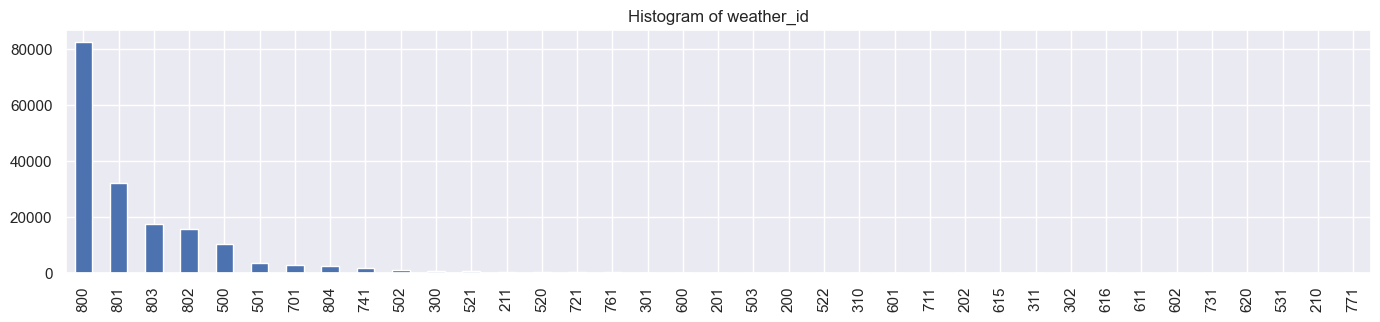

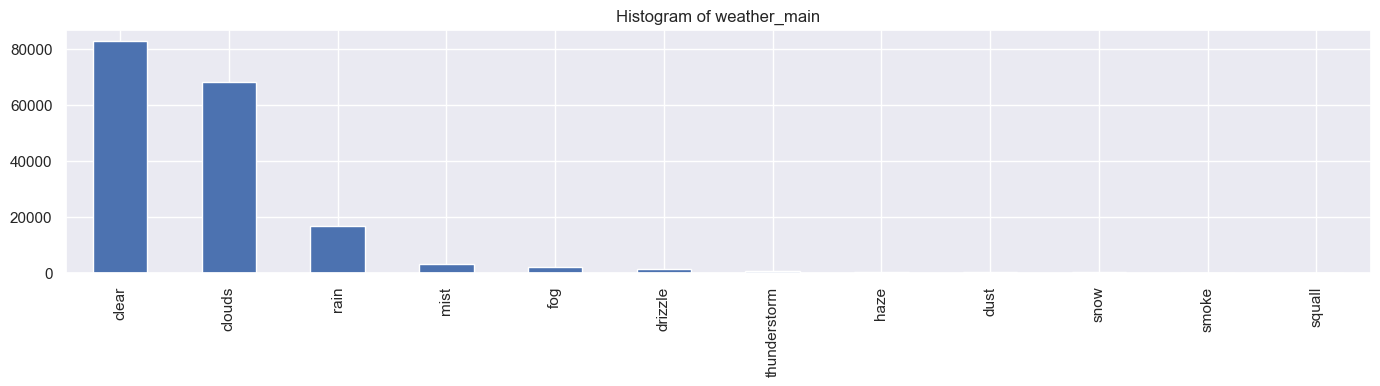

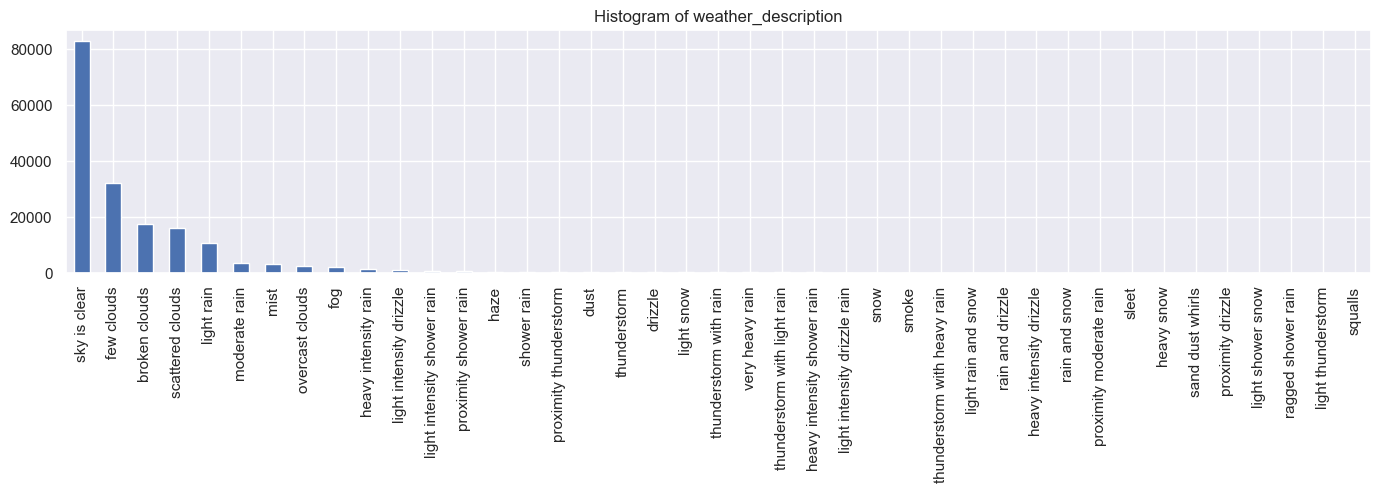

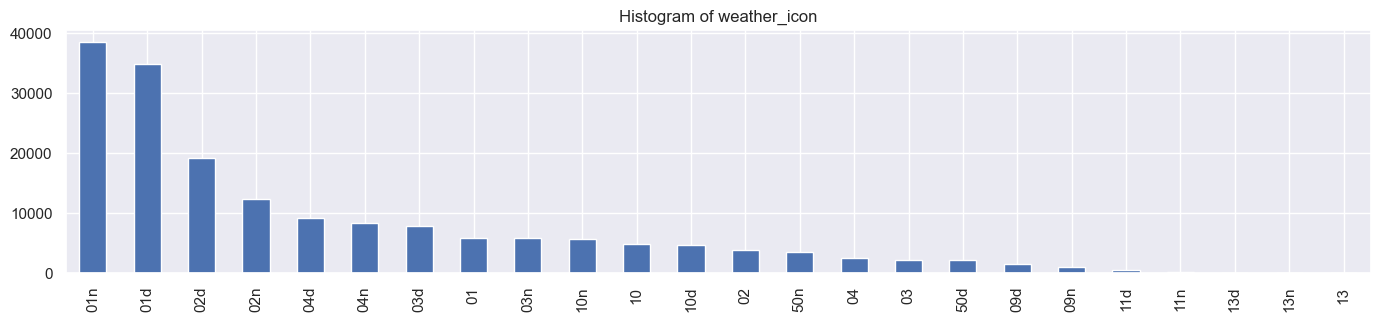

In [521]:
plot_histograms(weather_df, columns=['weather_id', 'weather_main', 'weather_description', 'weather_icon'], titles=None)